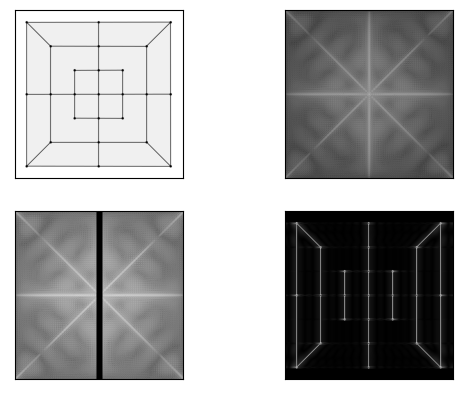

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import math

img = cv.imread('game.png', cv.IMREAD_GRAYSCALE)

rows,cols = img.shape

mid = math.ceil(cols/2)

# compute fourier coefficients of input image
img_float = np.float32(img)

dft = cv.dft(img_float, flags=cv.DFT_COMPLEX_OUTPUT)

dft_shift = np.fft.fftshift(dft)

magnitude = cv.magnitude(dft_shift[:,:,0],dft_shift[:,:,1])

spectrum = 20*np.log(1+magnitude)

# apply high-pass filter
res_dft_shift = dft_shift.copy()

res_dft_shift[:,mid-10:mid+10,:] = 0

res_magnitude = cv.magnitude(res_dft_shift[:,:,0],res_dft_shift[:,:,1])

res_spectrum = 20*np.log(1+res_magnitude)

# compute inverse fourier transform
res_dft = np.fft.ifftshift(res_dft_shift)

res_complex = cv.idft(res_dft)

res = cv.magnitude(res_complex[:,:,0], res_complex[:,:,1])

# plot results
plt.subplot(2,2,1), plt.imshow(img, cmap='gray')
plt.xticks([]), plt.yticks([])

plt.subplot(2,2,2), plt.imshow(spectrum, cmap='gray')
plt.xticks([]), plt.yticks([])

plt.subplot(2,2,3), plt.imshow(res_spectrum, cmap='gray')
plt.xticks([]), plt.yticks([])

plt.subplot(2,2,4), plt.imshow(res, cmap='gray')
plt.xticks([]), plt.yticks([])

plt.show() 